<img src="https://i.esdrop.com/d/7o0dj05m8rnz/JNGCMedl18.png" width="45%">

# 분류 - 타이타닉 생존자

---

In [1]:
# Visual Python: Data Analysis > Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Read CSV file

In [2]:
# Visual Python: Data Analysis > File
df = pd.read_csv('./data/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Visual Python: Data Analysis > Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Visual Python: Data Analysis > Data Info
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 컬럼 삭제: PassengerId, Name, Ticket, Cabin

In [5]:
# Visual Python: Data Analysis > Frame
df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


### 상관계수

In [6]:
# Visual Python: Data Analysis > Data Info
df.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


#### headmap

In [7]:
# Visual Python: Data Analysis > Data Info
_corr = df.corr(numeric_only=True)
_corr.style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### Factor 별 생존율 분석

#### Pclass vs Survived

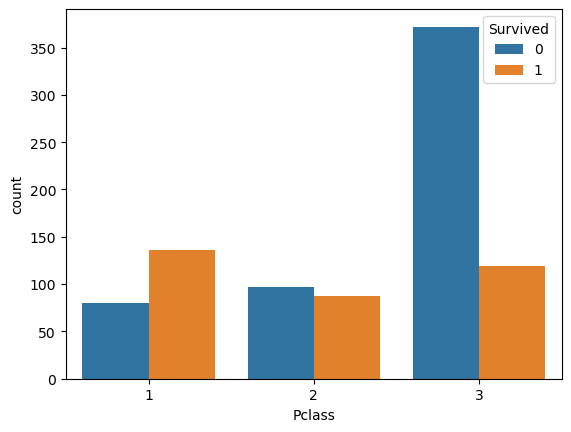

In [8]:
# Visual Python: Visualization > Seaborn
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.show()

#### Gender vs Survived

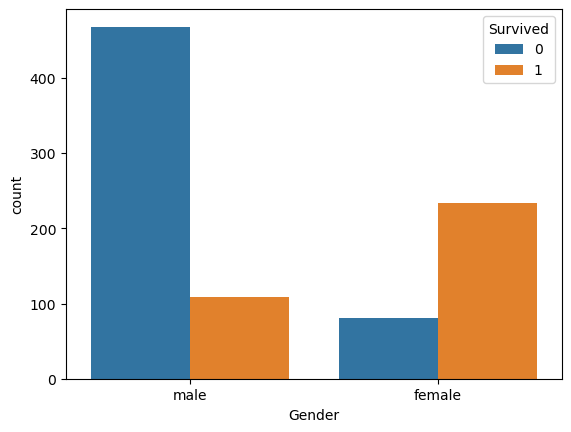

In [9]:
# Visual Python: Visualization > Seaborn
sns.countplot(data=df, x='Gender', hue='Survived')
plt.show()

### 결측치 확인

In [10]:
# Visual Python: Data Analysis > Data Info
pd.DataFrame({'Null Count': df.isnull().sum(), 'Non-Null Count': df.notnull().sum()})

,Null Count,Non-Null Count
Survived,0,891
Pclass,0,891
Gender,0,891
Age,177,714
SibSp,0,891
Parch,0,891
Fare,0,891
Embarked,2,889


### Embarked 결측치 채우기

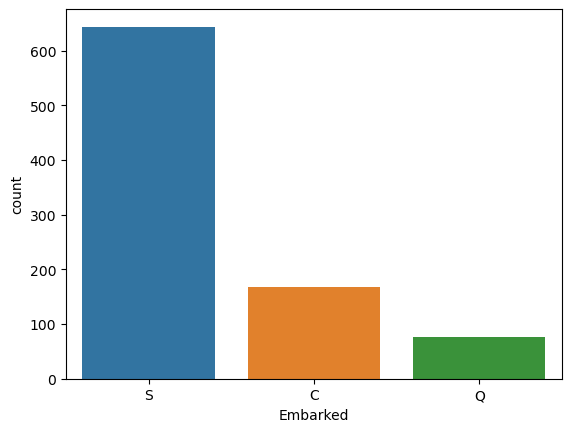

In [11]:
# Visual Python: Visualization > Seaborn
sns.countplot(data=df, x='Embarked')
plt.show()

In [12]:
# Visual Python: Data Analysis > Data Info
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
# Visual Python: Data Analysis > Frame
df['Embarked'] = df['Embarked'].fillna('S')
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [14]:
# Visual Python: Data Analysis > Data Info
pd.DataFrame({'Null Count': df.isnull().sum(), 'Non-Null Count': df.notnull().sum()})

,Null Count,Non-Null Count
Survived,0,891
Pclass,0,891
Gender,0,891
Age,177,714
SibSp,0,891
Parch,0,891
Fare,0,891
Embarked,0,891


### Age 결측치 채우기

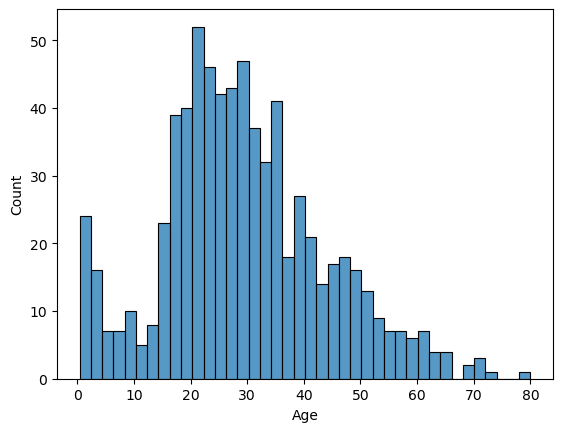

In [15]:
# Visual Python: Visualization > Seaborn
sns.histplot(data=df, x='Age', bins=40)
plt.show()

In [16]:
# Visual Python: Data Analysis > Data Info
df[['Age']].mean(numeric_only=True)

Age    29.699118
dtype: float64

#### 성별에 따른 나이 평균

In [17]:
# 남자 나이 평균
# Visual Python: Data Analysis > Instance
df.loc[(df['Gender'] == 'male'), 'Age'].mean()

30.72664459161148

In [18]:
# 여자 나이 평균
# Visual Python: Data Analysis > Instance
df.loc[(df['Gender'] == 'female'), 'Age'].mean()

27.915708812260537

#### 선실 등급('Pclass')별 나이 평균값

In [19]:
# Visual Python: Data Analysis > Data Info
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [20]:
# Pclass 1 나이 평균값
# Visual Python: Data Analysis > Instance
df.loc[(df['Pclass'] == 1), 'Age'].mean()

38.233440860215055

In [21]:
# Pclass 2 나이 평균값
# Visual Python: Data Analysis > Instance
df.loc[(df['Pclass'] == 2), 'Age'].mean()

29.87763005780347

In [22]:
# Pclass 3 나이 평균값
# Visual Python: Data Analysis > Instance
df.loc[(df['Pclass'] == 3), 'Age'].mean()

25.14061971830986

#### 성별(Sex), 선실 등급(Pclass)별 나이 평균값

In [23]:
# Visual Python: Data Analysis > Instance
mean_m_1 = df.loc[(df['Gender'] == 'male')&(df['Pclass'] == 1), 'Age'].mean()
mean_m_1

41.28138613861386

In [24]:
# Visual Python: Data Analysis > Instance
mean_m_2 = df.loc[(df['Gender'] == 'male')&(df['Pclass'] == 2), 'Age'].mean()
mean_m_2

30.74070707070707

In [25]:
# Visual Python: Data Analysis > Instance
mean_m_3 = df.loc[(df['Gender'] == 'male')&(df['Pclass'] == 3), 'Age'].mean()
mean_m_3

26.507588932806325

In [26]:
# Visual Python: Data Analysis > Instance
mean_f_1 = df.loc[(df['Gender'] == 'female')&(df['Pclass'] == 1), 'Age'].mean()
mean_f_1

34.61176470588235

In [27]:
# Visual Python: Data Analysis > Instance
mean_f_2 = df.loc[(df['Gender'] == 'female')&(df['Pclass'] == 2), 'Age'].mean()
mean_f_2

28.722972972972972

In [28]:
# Visual Python: Data Analysis > Instance
mean_f_3 = df.loc[(df['Gender'] == 'female')&(df['Pclass'] == 3), 'Age'].mean()
mean_f_3

21.75

#### Age 결측치 채우기

In [29]:
# Visual Python: Data Analysis > Frame
df.loc[(df['Age'].isnull())&(df['Gender'] == 'male')  &(df['Pclass'] == 1), 'Age'] = mean_m_1
df.loc[(df['Age'].isnull())&(df['Gender'] == 'male')  &(df['Pclass'] == 2), 'Age'] = mean_m_2
df.loc[(df['Age'].isnull())&(df['Gender'] == 'male')  &(df['Pclass'] == 3), 'Age'] = mean_m_3
df.loc[(df['Age'].isnull())&(df['Gender'] == 'female')&(df['Pclass'] == 1), 'Age'] = mean_f_1
df.loc[(df['Age'].isnull())&(df['Gender'] == 'female')&(df['Pclass'] == 2), 'Age'] = mean_f_2
df.loc[(df['Age'].isnull())&(df['Gender'] == 'female')&(df['Pclass'] == 3), 'Age'] = mean_f_3
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.00,1,0,7.2500,S
1,1,1,female,38.00,1,0,71.2833,C
2,1,3,female,26.00,0,0,7.9250,S
3,1,1,female,35.00,1,0,53.1000,S
4,0,3,male,35.00,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,13.0000,S
887,1,1,female,19.00,0,0,30.0000,S
888,0,3,female,21.75,1,2,23.4500,S
889,1,1,male,26.00,0,0,30.0000,C


In [30]:
# Visual Python: Data Analysis > Data Info
pd.DataFrame({'Null Count': df.isnull().sum(), 'Non-Null Count': df.notnull().sum()})

,Null Count,Non-Null Count
Survived,0,891
Pclass,0,891
Gender,0,891
Age,0,891
SibSp,0,891
Parch,0,891
Fare,0,891
Embarked,0,891


#### 컬럼 추가: Fsize = SibSp + Parch
#### 컬럼 삭제: SibSp, Parch

In [31]:
# Visual Python: Data Analysis > Frame
df['Fsize'] = df['SibSp'] + df['Parch'] + 1
df.drop(['SibSp','Parch'], axis=1, inplace=True)
df

,Survived,Pclass,Gender,Age,Fare,Embarked,Fsize
0,0,3,male,22.00,7.2500,S,2
1,1,1,female,38.00,71.2833,C,2
2,1,3,female,26.00,7.9250,S,1
3,1,1,female,35.00,53.1000,S,2
4,0,3,male,35.00,8.0500,S,1
...,...,...,...,...,...,...,...
886,0,2,male,27.00,13.0000,S,1
887,1,1,female,19.00,30.0000,S,1
888,0,3,female,21.75,23.4500,S,4
889,1,1,male,26.00,30.0000,C,1


---

## 머신러닝: 생존자 예측

### Encoding: 범주형 변수

In [32]:
# Visual Python: Data Analysis > Frame
df = pd.get_dummies(data=df, columns=['Gender','Embarked'])
df

,Survived,Pclass,Age,Fare,Fsize,Gender_female,Gender_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.00,7.2500,2,0,1,0,0,1
1,1,1,38.00,71.2833,2,1,0,1,0,0
2,1,3,26.00,7.9250,1,1,0,0,0,1
3,1,1,35.00,53.1000,2,1,0,0,0,1
4,0,3,35.00,8.0500,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.00,13.0000,1,0,1,0,0,1
887,1,1,19.00,30.0000,1,1,0,0,0,1
888,0,3,21.75,23.4500,4,1,0,0,0,1
889,1,1,26.00,30.0000,1,0,1,1,0,0


### 생존자 예측

In [33]:
# Visual Python: Machine Learning > Pipeline
# [1] Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Pclass', 'Age', 'Fare', 'Fsize', 'Gender_female', 'Gender_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']], df['Survived'])

# [2] Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

# [3] Fit
model.fit(X_train, y_train)

# [4] Predict
pred = model.predict(X_test)

# [5] Evaluation
from sklearn import metrics
from IPython.display import display, Markdown
# Confusion Matrix
display(Markdown('### Confusion Matrix'))
display(pd.crosstab(y_test, pred, margins=True))
# Classification report
print(metrics.classification_report(y_test, pred))

### Confusion Matrix

col_0,0,1,All
Survived,,,
0,121,28,149
1,14,60,74
All,135,88,223


              precision    recall  f1-score   support

           0       0.90      0.81      0.85       149
           1       0.68      0.81      0.74        74

    accuracy                           0.81       223
   macro avg       0.79      0.81      0.80       223
weighted avg       0.83      0.81      0.82       223



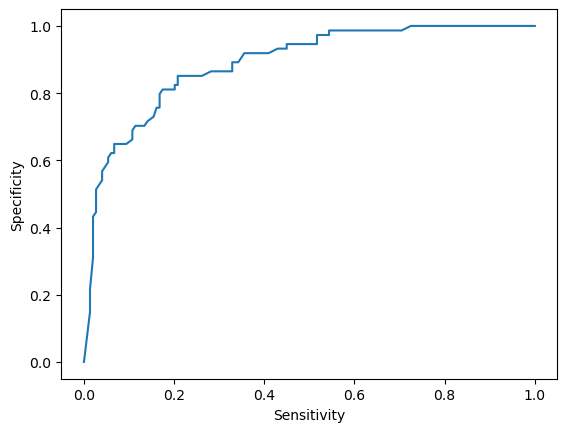

In [34]:
# Visual Python: Machine Learning > Model Info
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:, 1])                                
plt.plot(fpr, tpr, label='ROC Curve')                                
plt.xlabel('Sensitivity')                                
plt.ylabel('Specificity')                                
plt.show()

In [35]:
# Visual Python: Machine Learning > Model Info
def vp_create_feature_importances(model, X_train=None, sort=False):
    if isinstance(X_train, pd.core.frame.DataFrame):
        feature_names = X_train.columns
    else:
        feature_names = [ 'X{}'.format(i) for i in range(len(model.feature_importances_)) ]
                        
    df_i = pd.DataFrame(model.feature_importances_, index=feature_names, columns=['Feature_importance'])
    df_i['Percentage'] = 100 * df_i['Feature_importance']
    if sort: df_i.sort_values(by='Feature_importance', ascending=False, inplace=True)
    df_i = df_i.round(2)
                        
    return df_i
def vp_plot_feature_importances(model, X_train=None, sort=False, top_count=0):
    df_i = vp_create_feature_importances(model, X_train, sort)
                        
    if sort: 
        if top_count > 0:
            df_i['Percentage'].sort_values().tail(top_count).plot(kind='barh')
        else:
            df_i['Percentage'].sort_values().plot(kind='barh')
    else: 
        df_i['Percentage'].plot(kind='barh')
    plt.xlabel('Feature importance Percentage')
    plt.ylabel('Features')
                        
    plt.show()

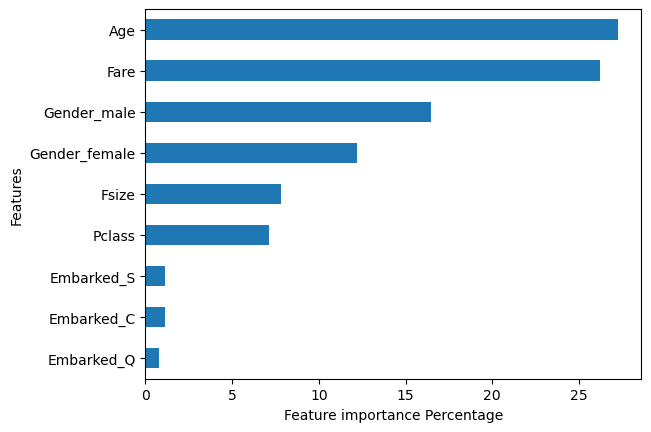

In [36]:
# Visual Python: Machine Learning > Model Info
vp_plot_feature_importances(model, X_train, sort=True)

---

In [37]:
# End of file